In [207]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [208]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [209]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS
0,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
1,0.000000,877.07654,0.000,1.521449e-12,0.000000,0.000000,0,5,0.000000,0,0.531786,NO
2,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,2,1.000000,0,0.000000,UNKNOWN
3,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
4,0.538812,796.06140,2.948,4.089147e+00,0.218344,0.231184,0,0,0.037146,2,0.941222,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.227070,759.53076,3.418,4.006609e+00,0.195128,0.424818,0,0,0.258356,5,0.768236,UNKNOWN
96,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
97,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,NO


In [210]:
train=train.reset_index(drop=True)

<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

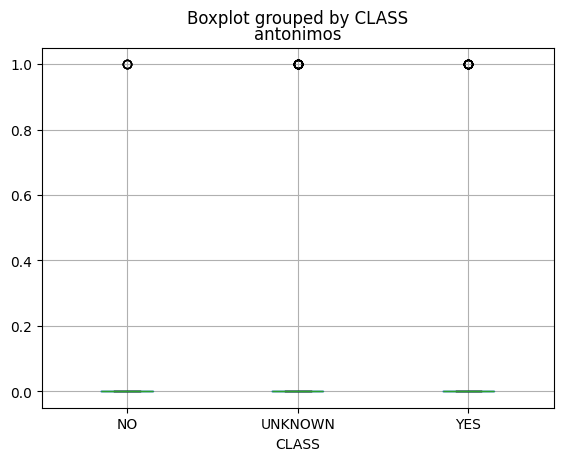

In [211]:
train.boxplot(by="CLASS",column=["antonimos"])

In [212]:
temp1=train.copy()

In [213]:
#for indexi, strings in temp1.iterrows():    
#    if "YES" ==str(strings["CLASS"].strip()):
#       train.at[indexi,"incompatibilidad"]=0

In [214]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS
0,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
1,0.000000,877.07654,0.000,1.521449e-12,0.000000,0.000000,0,5,0.000000,0,0.531786,NO
2,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,2,1.000000,0,0.000000,UNKNOWN
3,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
4,0.538812,796.06140,2.948,4.089147e+00,0.218344,0.231184,0,0,0.037146,2,0.941222,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.227070,759.53076,3.418,4.006609e+00,0.195128,0.424818,0,0,0.258356,5,0.768236,UNKNOWN
796,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
797,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,UNKNOWN
798,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,0.000000,NO


In [215]:
#train.boxplot(by="CLASS",column=["incompatibilidad"])

In [216]:
train=train.drop(["antonimos","sim_faltantes","distancias","suma","wmd"],axis=1)
train

,entropias,mutual_info,m_earth,max_info_p,relaciones,incompatibilidad,CLASS
0,0.000,0.000000e+00,0.000000,0.000000,0,0,YES
1,0.000,1.521449e-12,0.000000,0.000000,5,0,NO
2,0.000,0.000000e+00,0.000000,0.000000,2,0,UNKNOWN
3,0.000,0.000000e+00,0.000000,0.000000,0,0,YES
4,2.948,4.089147e+00,0.218344,0.231184,0,2,YES
...,...,...,...,...,...,...,...
795,3.418,4.006609e+00,0.195128,0.424818,0,5,UNKNOWN
796,0.000,0.000000e+00,0.000000,0.000000,0,0,YES
797,0.000,0.000000e+00,0.000000,0.000000,0,0,UNKNOWN
798,0.000,0.000000e+00,0.000000,0.000000,0,0,NO


In [217]:
X = np.nan_to_num(np.array(train.drop(['CLASS'],axis=1)))
y_ = np.array(train['CLASS'])

In [218]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i== "UNKNOWN":
        y_train.append(2)
    else:
        y_train.append(0)

In [219]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

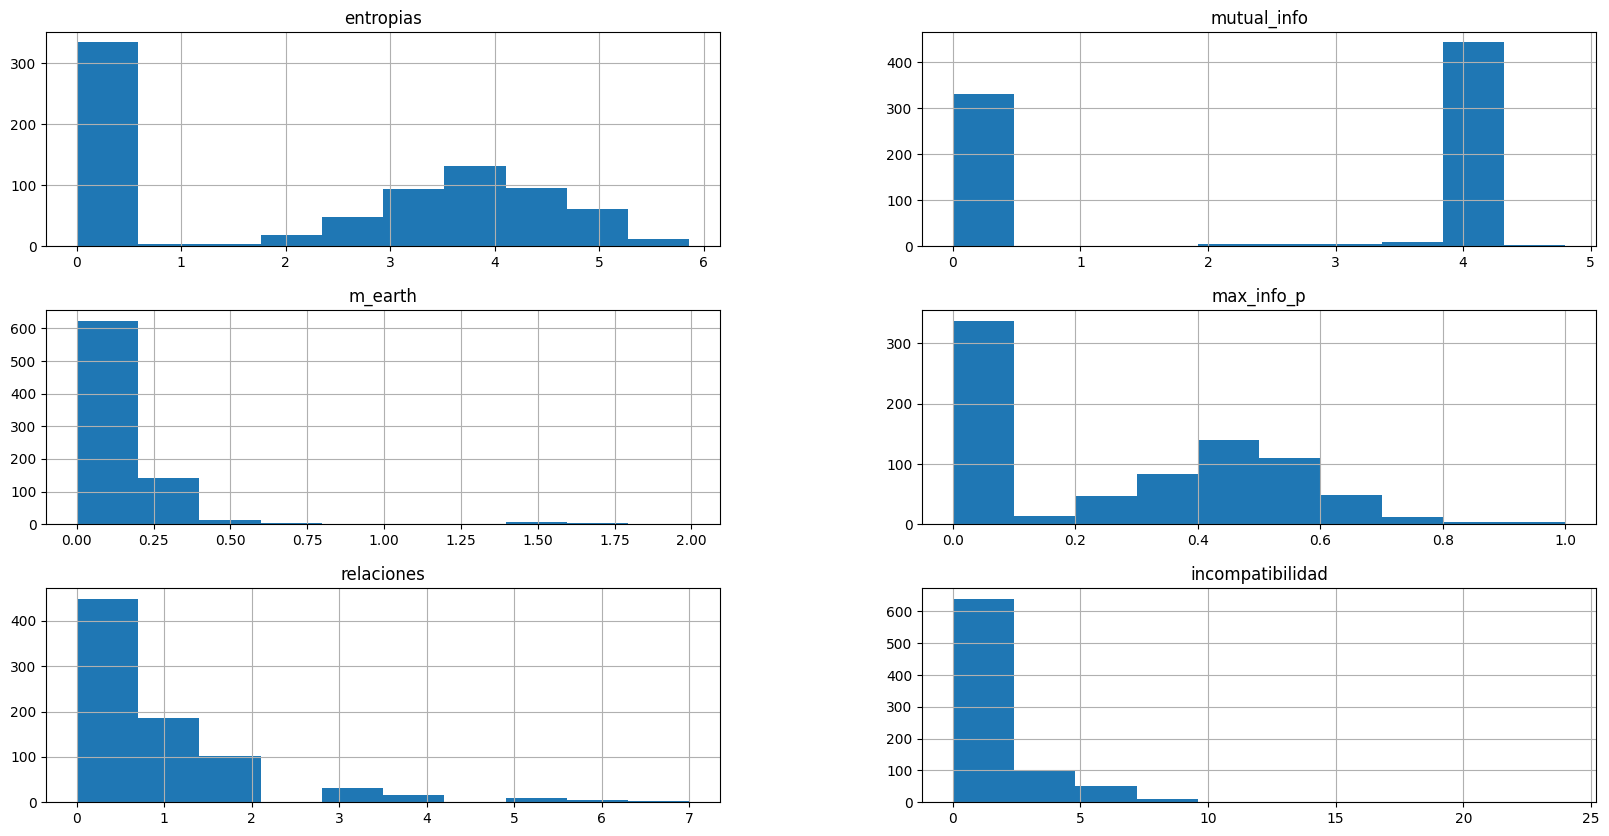

In [220]:
train.hist(figsize=(20,10))
plt.show()

In [221]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [222]:
test=test.reset_index(drop=True)

In [223]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [224]:
test=test.drop(["antonimos","sim_faltantes","distancias","suma","wmd"],axis=1)
test

,entropias,mutual_info,m_earth,max_info_p,relaciones,incompatibilidad,CLASS
0,2.641,1.970158e+00,0.737451,0.135764,3,0,YES
1,3.750,4.042872e+00,0.188107,0.393066,0,4,YES
2,0.000,7.513989e-13,1.427735,0.000000,0,0,YES
3,0.000,0.000000e+00,0.000000,0.000000,0,0,YES
4,3.807,3.915644e+00,0.221755,0.412710,0,1,NO
...,...,...,...,...,...,...,...
795,0.000,0.000000e+00,0.000000,0.000000,1,0,YES
796,0.000,0.000000e+00,0.000000,0.000000,0,0,NO
797,3.892,3.976425e+00,0.173972,0.467463,0,0,UNKNOWN
798,2.750,3.902124e+00,0.357005,0.353093,0,1,UNKNOWN


In [225]:
X_t = np.nan_to_num(np.array(test.drop(['CLASS'],axis=1)))
y_t = np.array(test['CLASS'])

In [226]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i=="UNKNOWN":
        y_test.append(2)
    else:
        y_test.append(0)

In [227]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [228]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [229]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [230]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [231]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [232]:
model.decision_function(X)

array([[-0.70551993,  1.05586092, -0.35034099],
       [-2.07888911,  0.79593392,  1.28295518],
       [-1.2548676 ,  0.95189012,  0.30297748],
       ...,
       [-0.70551993,  1.05586092, -0.35034099],
       [-0.70551993,  1.05586092, -0.35034099],
       [-0.74230239,  0.47839925,  0.26390314]])

In [233]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutual_info', 'm_earth', 'max_info_p', 'relaciones',
       'incompatibilidad'],
      dtype='object')

In [234]:
model.classes_

array([0, 1, 2])

In [235]:
model.coef_[0]

array([-0.64373749,  0.60577038, -0.08734147, -0.13877988, -0.33211406,
        0.18782444])

In [236]:
coeficientes=model.coef_[0]

In [237]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  1 mutual_info 0 entropias


In [238]:
n_columns=train.shape[1]-1

In [239]:
n_columns

6

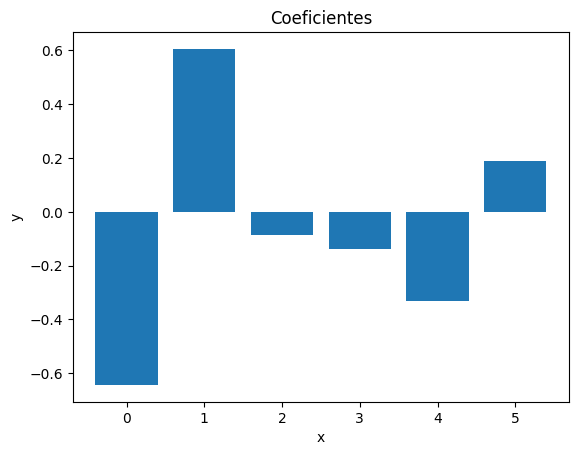

In [240]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [241]:
predictions = model.predict(X_test)

In [242]:
print(confusion_matrix(predictions,y_test))

[[  0   0   0]
 [ 53 308 165]
 [ 19 102 153]]


In [243]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average='weighted',zero_division=0),2))
print("recall",round(recall_score(y_test,predictions,average='weighted',zero_division=0),2))
print("f1_score: ",round(f1_score(y_test,predictions,average='weighted',zero_division=0),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.58
precision:  0.52
recall 0.58
f1_score:  0.54
matthews_score:  0.2


In [244]:
X_train.shape

(800, 6)

In [245]:
X_test.shape

(800, 6)

In [246]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [247]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size,stratify=Y_cv)

In [248]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.051767)


In [249]:
f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions))

0.5964295074871998

In [250]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

Logistic Regression: 0.390000 (0.042518)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

In [251]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.051767)


In [252]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.400000 (0.038171)


In [253]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.240000 (0.105211)


In [254]:
print(list(Y_train_cv).count(0))
print(list(Y_train_cv).count(1))
print(list(Y_train_cv).count(2))


150
814
620


In [255]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [256]:
#linear_model

In [257]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [258]:
y_predict = model.predict(X_test)
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      0.59      0.66       526
           2       0.48      0.56      0.52       274

    accuracy                           0.58       800
   macro avg       0.41      0.38      0.39       800
weighted avg       0.66      0.58      0.61       800



Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [259]:
explainer = shap.LinearExplainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [260]:
explainer.expected_value

array([-1.11210733,  0.65341155,  0.45869579])

In [261]:
explainer.coef

array([[-0.64373749,  0.60577038, -0.08734147, -0.13877988, -0.33211406,
         0.18782444],
       [-0.26851518, -0.17672997,  0.02900327,  0.17850214, -0.06285667,
        -0.04835617],
       [ 0.91225267, -0.42904041,  0.0583382 , -0.03972226,  0.39497073,
        -0.13946827]])

In [262]:
shap.plots.beeswarm(shap_values[0])

IndexError: tuple index out of range

In [ ]:
y_test[:6]

[1, 1, 1, 1, 0, 1]

In [ ]:
ind = 1
shap.plots.force(shap_values[ind])

In [ ]:
ind = 4
shap.plots.force(shap_values[ind])

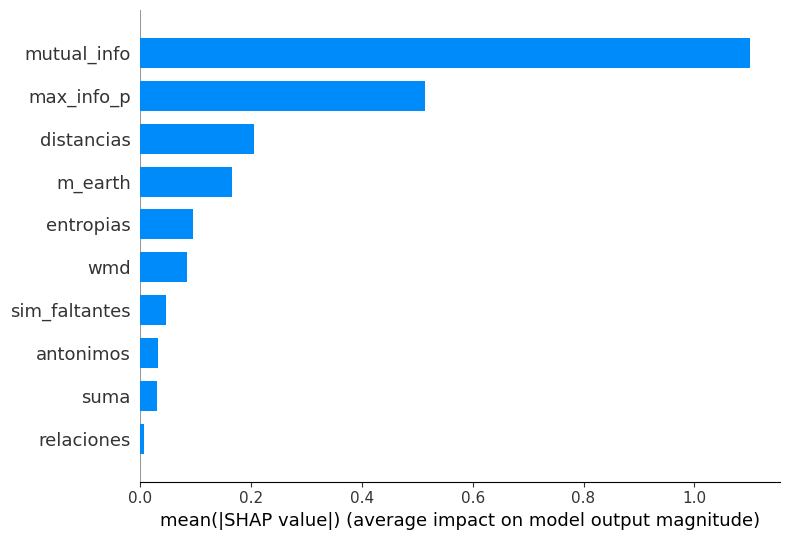

In [ ]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

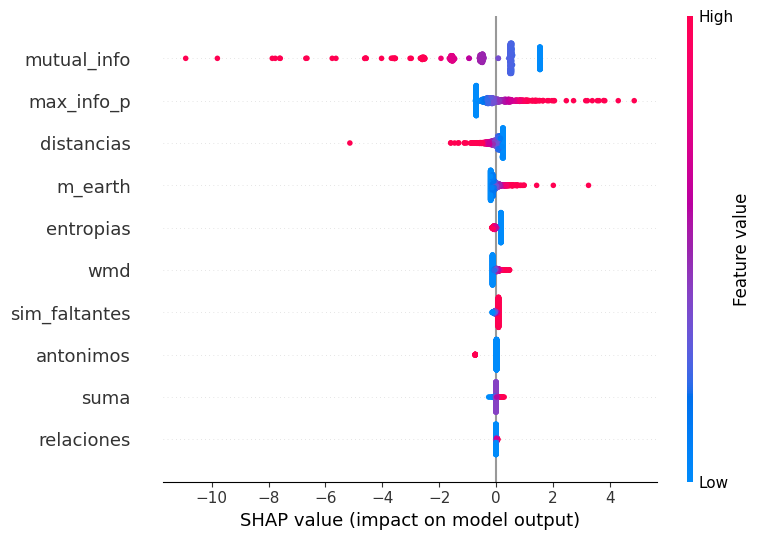

In [ ]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

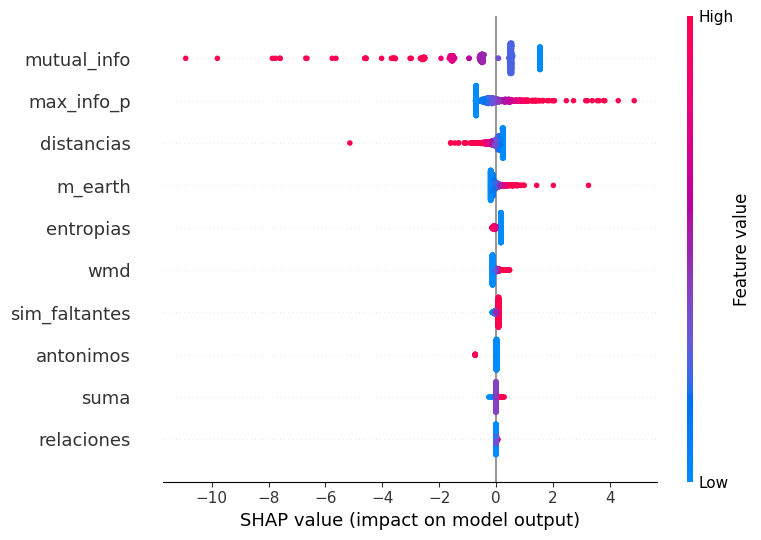

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

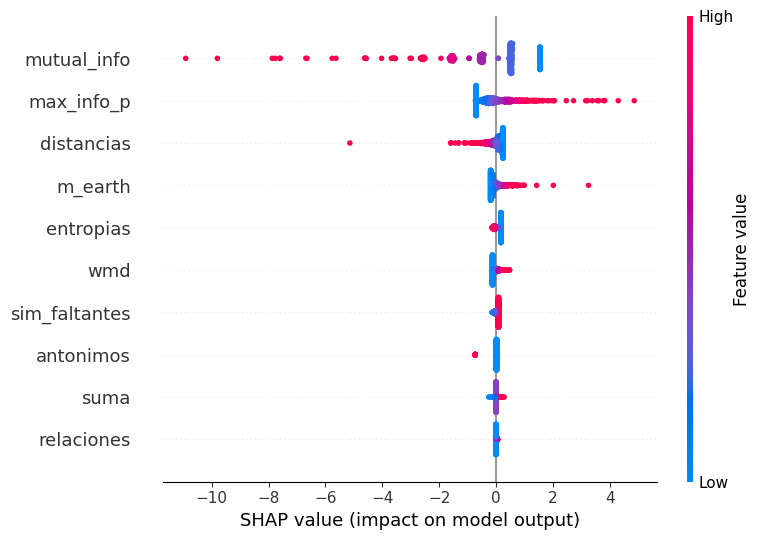

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.07195244864074858

In [ ]:
shap_values.shape

(800, 10)